In [1]:
print('hello')

hello


Assignment : 
Assignment:
    
AI Travel Agent & Expense Planner(Purpose: Trip planning for any city worldwide with Realtime data.")

• Real-time weather information
• Top attractions and activities
• Hotel cost calculation (per day × total days)
• Currency conversion to user's native currency
• Complete itinerary generation
• Total expense calculation
• generate a summary of the entire output

user_input
  |
search attraction and activity
1. search attracation
2. search restaurant
3. search activity
4. search transportation
  |
search weather forcasting
1. get current weather
2. get weather forcast
  |
search hotel costs
1. search hotel
2. estimate the hotel cost
3. budget_range
  |
calculate total cost
1. add
2. multiply
3. calculated total cost
4. calcualte the daily budget
    | 
currency_converion
1. get exchnage rate
2. convert currancy
    | 
Itinery generation
1. get day plan
2. crete full itinery
    |
create Trip Summary
    |
Retun complete traval plan

Note: if you know the OOPS then design this entire system using object and class in modular fashion.


deadline is till next friday 9PM IST


 everyone you can submit the assignments in this form. MAke sure to have one GitHub link and put all the assignments there https://forms.gle/g8RZ4qx8yvNcih4B7    
    

### Call LLM | Create tools - Custom Tools :[ Multiply | Addition | Division ] | Create built in tools : [ Weather(OpenWeatherMap) : Google Serper [ Top attractions:restraunt:Avg expese/day] ]

In [ ]:
# # Calling LLM
# from dotenv import load_dotenv
# load_dotenv()
# import os 
# os.environ['GROQ_API_KEY'] = os.getenv("GROQ_API_KEY")
# from langchain_groq import ChatGroq
# llm = ChatGroq(
#     model_name="deepseek-r1-distill-llama-70b",
#     temperature=0
# )
# response=llm.invoke("what is length of wall of china?")
# response.content

In [2]:
from dotenv import load_dotenv
import os
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage, SystemMessage
from langchain.tools import tool

# 3. Load environment variables
load_dotenv()
os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")

# 4. Initialize OpenAI model
llm = ChatOpenAI(
    model="gpt-4o",  # Choose your model
    temperature=0,         # Deterministic responses
    max_tokens=2000,       # Longer responses for travel plans
    api_key=os.getenv("OPENAI_API_KEY")
)
response=llm.invoke("what is length of wall of china?")
response.content

'The Great Wall of China is approximately 13,171 miles (21,196 kilometers) long. This length includes all of its branches and sections built over various dynasties.'

Creating custom tools 

In [3]:
from langchain.tools import tool

In [4]:
# Creating custom tools #Addition
@tool
def addition(a:int,b:int) -> int:
    """
    Add two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The sum of a and b.
    """
    return a + b


In [5]:
# Creating custom tools #Multiplication
@tool
def multiply(a:int,b:int) -> int:
    """
    Multiply two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The product of a and b.
    """
    return a * b


In [8]:
# Creating custom tool - Division
@tool
def division(a: int, b: int) -> float:
    """
    Divide two integers.

    Args:
        a (int): The numerator.
        b (int): The denominator (must not be 0).

    Returns:
        float: The result of the division.
    """
    if b == 0:
        raise ValueError("Denominator cannot be zero.")
    return a / b


In [10]:
# Creating custom tools #Division
@tool
def substraction (a:int,b:int) -> float:
    """
    Substract two integers.

    Args:
        a (int): The first integer.
        b (int): The second integer.

    Returns:
        int: The substraction of a and b.
    """
    return a - b


## Creating built in tools 

In [11]:
# #weather tool
# from dotenv import load_dotenv
# load_dotenv()
# import os
# os.environ["OPENWEATHERMAP_API_KEY"] = os.getenv("OPENWEATHERMAP_API_KEY")
# from langchain_community.utilities import OpenWeatherMapAPIWrapper
# weather = OpenWeatherMapAPIWrapper()
# # weather_data = weather.run("Leh,IND")
#weather tool function

from dotenv import load_dotenv
from langchain_community.utilities import OpenWeatherMapAPIWrapper
load_dotenv()
import os
os.environ["OPENWEATHERMAP_API_KEY"] = os.getenv("OPENWEATHERMAP_API_KEY")
@tool
def get_weather (city:str) -> str:
 """
    Fetches the current weather of the city from Openweathermap.

    Args:
        City (str): The city for which temperature is required ("Delhi","New York","Paris)

    Returns:
        str: A message with the current weather of the city
    """
 weather = OpenWeatherMapAPIWrapper()
 return weather.run(city)


In [12]:
# Serper API
from dotenv import load_dotenv
from langchain_community.utilities import GoogleSerperAPIWrapper
load_dotenv()
import os
os.environ["SERPER_API_KEY"] = os.getenv("SERPER_API_KEY")
@tool
def search_google(query:str) ->str:
    """Fetches the details about 
    1.search attracation
    2. search restaurant
    3. search activity
    4. search transportation
    5. search hotel
    6. estimate the hotel cost
    7. budget_range  from Google Serper API.

    Args:
        Query (str): The Query for which details is required ("restaurant in Delhi"," hotels in New York","activities in Paris)

    Returns:
        str: A answer with the desired queries from user"""
    search_serper = GoogleSerperAPIWrapper()
    return search_serper.run(query)
# search_serper.run("What are the most famous restraunts in Delhi")

In [13]:
# DuckDuck go search
from langchain_community.tools import DuckDuckGoSearchRun
@tool
def search_duck(query:str) -> str:
    """Fetches the details about 
    1.search attracation
    2. search restaurant
    3. search activity
    4. search transportation
    5. search hotel
    6. estimate the hotel cost
    7. budget_range  from DuckDuckGoSearchRun.

    Args:
        Query (str): The Query for which details is required ("restaurant in Delhi"," hotels in New York","activities in Paris)

    Returns:
        str: A answer with the desired queries from user"""
    search_d = DuckDuckGoSearchRun()
    return(search_d.invoke(query))

# query = "Tell me about Jaipur"
# search_duck(query)

In [14]:
#Advanced calculation tool
from langchain_core.tools import Tool
from langchain_experimental.utilities import PythonREPL
python_repl = PythonREPL()
# You can create the tool to pass to an agent
repl_tool = Tool(
    name="python_repl",
    description="A Python shell. Use this to execute python commands. Input should be a valid python command. If you want to see the output of a value, you should print it out with `print(...)`.",
    func=python_repl.run,
)

In [15]:
#youtube video 
from langchain_community.tools import YouTubeSearchTool
@tool
def youtube_search(query:str)->str:
    """Fetches the youtube videos about 
    1. attraction
    2. restaurant
    3. activity
    4. hotel
    5. vlogs for the city asked about from youtube
    Args:
        Query (str): The Query for which details is required ("restaurant in Delhi"," hotels in New York","activities in Paris)
    Returns:
        str: A answer with the desired video url for user"""
    youtubetool = YouTubeSearchTool()
    return youtubetool.run(query)




In [16]:
tools=[addition,multiply, division, substraction,get_weather,search_google,search_duck,repl_tool,youtube_search]

In [17]:
llm_with_tools=llm.bind_tools(tools)

In [18]:
response=llm_with_tools.invoke("can you give me a latest weather for Jaipur?")
response.tool_calls

[{'name': 'get_weather',
  'args': {'city': 'Jaipur'},
  'id': 'call_Mydk9O2nY9N0zenvo7lHAGIs',
  'type': 'tool_call'}]

In [19]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START
# system_prompt = SystemMessage ("You are a helpful travel planning agent. Analyze user queries to identify their destination city and create comprehensive travel plans using these tools strategically: **Core Tasks:** 1. **Weather Check**: Use get_weather for current conditions 2. **Research Phase**: Use search_google OR search_duck for attractions, restaurants, activities   3. **Visual Content**: Use youtube_search for travel videos/vlogs 4. **Calculations**: Use repl_tool for complex math, arithmetic tools for simple calculations 5. **Itinerary**: Generate day-by-day plans using your knowledge 6. **Summary**: Provide clear, actionable travel recommendations**Guidelines:** - Always ask for missing details (dates, budget, preferences) - Present information in organized, easy-to-read format - Calculate total costs clearly- Provide practical, actionable advice")
# Instead of dedicated currency tool, update your system prompt:

system_prompt = SystemMessage("""
You are a professional AI Travel Agent. You MUST follow this EXACT process for every travel query:

STEP 1: ALWAYS call get_weather tool first for the destination city

STEP 2: ALWAYS call search_google or search_duck to find:
   - Hotels with specific prices per night
   - Top attractions with entry fees
   - Restaurants with price ranges
   - Transportation options with costs
   - CURRENCY CONVERSION: If user needs different currency, search for:
     "current exchange rate [from_currency] to [to_currency] today"
     "100 [from_currency] to [to_currency] conversion rate"

STEP 3: ALWAYS use arithmetic tools (addition, multiply) to calculate:
   - Hotel cost = daily_rate × number_of_days
   - Total food cost = daily_food_budget × number_of_days
   - Total attraction costs = sum of all entry fees
   - Currency conversion = amount × exchange_rate (from search)
   - Grand total = hotel + food + attractions + transport

STEP 4: ALWAYS call youtube_search for relevant travel videos

STEP 5: Create detailed day-by-day itinerary with REAL costs from your searches

MANDATORY RULES:
- For currency conversion: SEARCH for current exchange rates, don't guess
- Use ACTUAL data from tool calls, never make up prices
- Show detailed cost breakdown with calculations
- Include weather information from the weather tool
- Provide YouTube video links from your search

EXAMPLES of currency searches:
- "current USD to INR exchange rate today"
- "500 USD to Indian Rupees conversion"
- "EUR to THB exchange rate December 2024"

FORMAT your response as:
## Weather Information (from get_weather tool)
## Currency Conversion (from search results)
## Attractions & Activities (from search tools)
## Hotels & Accommodation (from search tools)
## Daily Itinerary (day-by-day breakdown)
## Cost Breakdown (using calculation tools + currency conversion)
## YouTube Resources (from youtube_search)
## Summary
""")

In [ ]:
# user_query=["tell me what is 2+2"]
# [system_prompt]+user_query

In [20]:
from langchain_core.messages import HumanMessage, SystemMessage
from langgraph.graph import MessagesState,StateGraph, END, START
def function_1(state:MessagesState):
    user_question = state["messages"]
    input_question = [system_prompt]+user_question
    response = llm_with_tools.invoke(input_question)
    return {
        "messages" : [response]
    }


In [21]:
builder = StateGraph(MessagesState)

In [22]:
builder.add_node("llm_decision_step",function_1)

In [29]:
ToolNode(tools)

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'addition': StructuredTool(name='addition', description='Add two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The sum of a and b.', args_schema=<class 'langchain_core.utils.pydantic.addition'>, func=<function addition at 0x13c3cf2e0>), 'multiply': StructuredTool(name='multiply', description='Multiply two integers.\n\nArgs:\n    a (int): The first integer.\n    b (int): The second integer.\n\nReturns:\n    int: The product of a and b.', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x13c3cfa60>), 'division': StructuredTool(name='division', description='Divide two integers.\n\nArgs:\n    a (int): The numerator.\n    b (int): The denominator (must not be 0).\n\nReturns:\n    float: The result of the division.', args_schema=<class 'langchain_core

In [32]:
from langgraph.prebuilt import ToolNode
builder.add_node("tools",ToolNode(tools))


ValueError: Node `tools` already present.

In [33]:
builder.add_edge(START,"llm_decision_step")

In [34]:
from langgraph.prebuilt import tools_condition
builder.add_conditional_edges(
    "llm_decision_step",
    tools_condition
)


In [35]:
builder.add_edge("tools","llm_decision_step")

In [36]:
react_graph=builder.compile()

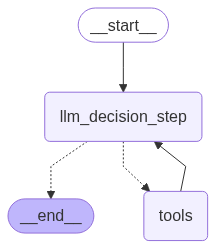

In [37]:
from IPython.display import Image, display
display(Image(react_graph.get_graph().draw_mermaid_png()))

In [38]:
from langchain_core.messages import HumanMessage

# Test your travel agent!
response = react_graph.invoke({
    "messages": [HumanMessage("""
I want to visit Thailand for 5 days.
My budget is 800 USD.
Please convert all costs to Indian Rupees for me.
Get current weather for Bangkok.
Find budget hotels under 30 USD per night.
Include food costs (street food vs restaurants).
Show me temple entry fees and transportation costs.
Calculate total trip cost in both USD and INR.
Show me Bangkok travel videos.
I need detailed cost breakdown with currency conversion.
""")]
})

response["messages"][-1].content
for m in response["messages"]:
    m.pretty_print()

Python REPL can execute arbitrary code. Use with caution.


================================ Human Message =================================


I want to visit Thailand for 5 days.
My budget is 800 USD.
Please convert all costs to Indian Rupees for me.
Get current weather for Bangkok.
Find budget hotels under 30 USD per night.
Include food costs (street food vs restaurants).
Show me temple entry fees and transportation costs.
Calculate total trip cost in both USD and INR.
Show me Bangkok travel videos.
I need detailed cost breakdown with currency conversion.

================================== Ai Message ==================================
Tool Calls:
  get_weather (call_sSBsPCox8Imc5l26iC68HHEN)
 Call ID: call_sSBsPCox8Imc5l26iC68HHEN
  Args:
    city: Bangkok
================================= Tool Message =================================
Name: get_weather

In Bangkok, the current weather is as follows:
Detailed status: overcast clouds
Wind speed: 2.99 m/s, direction: 192°
Humidity: 74%
Temperature: 
  - Current: 29.54°C
  - High: 29.54°C
  - L